In [1]:
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

In [2]:
sys.path.append("..") 

from api.utilies import plotstats as ps
from api.utilies.fileworker import get_raiting_

In [4]:
def to_float(r):
    try:
        return float(r)
    except:
        return 0

In [5]:
apvo = pd.read_csv('../data/prep/apvo_dataset.csv')
ssps = pd.read_csv('../data/prep/ssps_dataset.csv')

In [6]:
dataset = apvo.merge(ssps, on=['date', 'machine_type', 'machine_number'], how='inner')
dataset['month'] = dataset['date'].values.astype('datetime64[M]')
data_m = dataset[(dataset.mesure == 'м') & (dataset.value > 0)]

In [7]:
data_m.rate_norm = data_m.rate_norm.apply(to_float)
data_m.rate_fact = data_m.rate_fact.apply(to_float)
data_m.low_rate = data_m.low_rate.apply(to_float)
data_m.up_rate = data_m.up_rate.apply(to_float)
data_m.residue = data_m.residue.apply(to_float)
data_m['ratio'] = data_m.rate_fact / data_m.value

In [8]:
data = pd.read_csv('../api/tmp/cashes/data/data_m.csv')

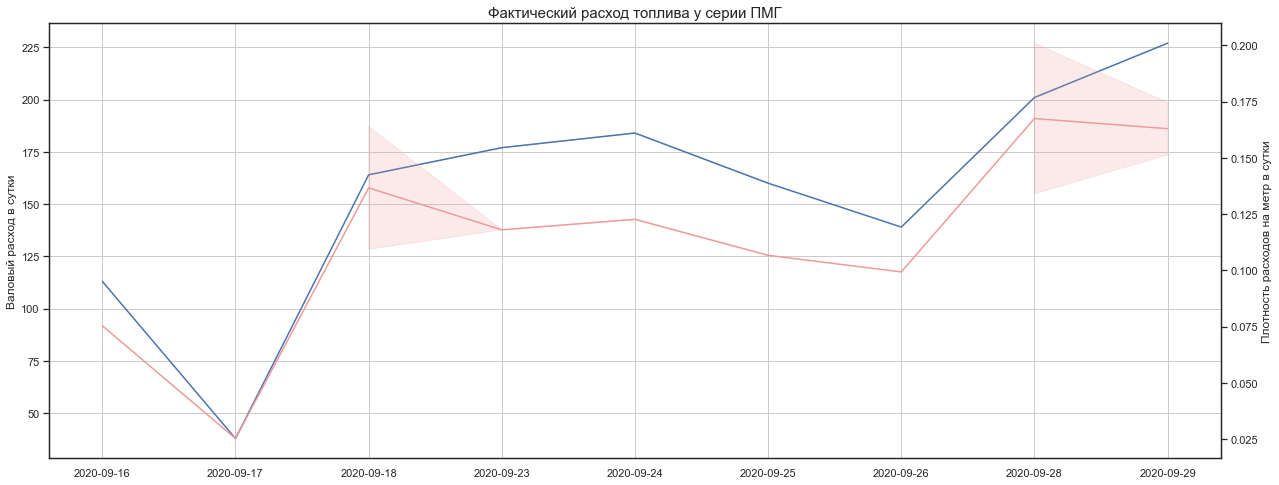

In [9]:
ps.plot_rate_fact(data, 'ПМГ', '2020-09-01', '../api/tmp/cashes/plots/{0}')

In [10]:
dims = data_m.groupby(by=['machine_type']).mean()[['rate_fact', 'ratio']].reset_index()

In [11]:
data_m['machine_type'].value_counts()

ДУОМАТИК09-32GSM    733
РПБ-01              625
ЩОМ-1200М           197
ПМГ                 184
ПМГ-1М              131
ДСП-С6              117
ЩОМ-700              50
ЩОМ-1600Т            31
ПУМА2012             19
ЩОМ-1200             18
СМ-2                 11
ВПО-3000              6
СПП-16                3
ЭЛБ-4С                2
ЭЛБ-3                 2
ЭЛБ-4                 1
СМ-2Б                 1
СМ-2М                 1
Name: machine_type, dtype: int64

In [12]:
columns_map = {
    "date": "Дата работ",
    "machine_type": "Серия машины",
    "value": "Вып. объем физич.",
    "company_y": "Предприятие",
    "au12": "АУ-12",
    "rate_norm": "Расход топлива по норме",
    "rate_fact": "Расход топлива по фактический",
    "low_rate": "Экономия",
    "up_rate": "Перерасход",
    "residue": "Остаток в баках на конец периода"
}

In [13]:
dataset = pd.read_csv('../api/tmp/cashes/data/dataset.csv')

In [31]:
s = get_raiting_(dataset, '2020-05-01', 'residue')
s

'{"0":{"machine_type":"\\u0414\\u0423\\u041e\\u041c\\u0410\\u0422\\u0418\\u041a09-32GSM","machine_number":39,"residue":84443.0},"1":{"machine_type":"\\u041c\\u041f\\u0422-4","machine_number":1211,"residue":35448.8},"2":{"machine_type":"\\u0429\\u041e\\u041c-1200\\u041c","machine_number":19,"residue":24585.0},"3":{"machine_type":"\\u041c\\u041f\\u0422-4","machine_number":1408,"residue":19637.0},"4":{"machine_type":"\\u0420\\u041f\\u0411-01","machine_number":108,"residue":19323.0}}'

In [15]:
raiting_maps = {
    "Расход топлива по норме": "rate_norm",
    "Расход топлива по фактический": "rate_fact",
    "Экономия": "low_rate",
    "Перерасход": "up_rate",
    "Остаток в баках на конец периода": "residue"
}